In [0]:
print (10+20)

30


#####1. Loading The Dataset

In [0]:
df=spark.read.option("header",True).option("inferSchema",True).csv("/FileStore/tables/Salary_Data-2.csv")

In [0]:
display(df)

YearsExperience,Salary
1.1,39343.0
1.3,46205.0
1.5,37731.0
2.0,43525.0
2.2,39891.0
2.9,56642.0
3.0,60150.0
3.2,54445.0
3.2,64445.0
3.7,57189.0


In [0]:
df=df.toPandas()
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


#####2. Separate Dependent and Independent Columns

In [0]:


X=df.iloc[:, 0:1].values
X

Out[36]: array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [0]:
y=df.iloc[:,1].values
y

Out[37]: array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

#####3.Handling Missing Values

In [0]:
from sklearn.impute import SimpleImputer
import numpy as np
Imputer=SimpleImputer(missing_values=np.NaN,strategy="mean")
Imputer=Imputer.fit(df.iloc[:,0:2])
df.iloc[:,0:2]=Imputer.transform(df.iloc[:,0:2])

In [0]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


#####4.Train-Test Split

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [0]:
X_train

Out[41]: array([[ 3.2],
       [ 4.9],
       [ 1.5],
       [10.5],
       [ 8.7],
       [ 3. ],
       [ 3.7],
       [ 3.2],
       [ 9. ],
       [ 4.1],
       [ 4. ],
       [ 5.1],
       [ 4. ],
       [ 7.9],
       [ 2.9],
       [10.3],
       [ 3.9],
       [ 6. ],
       [ 2. ],
       [ 5.9],
       [ 6.8],
       [ 4.5],
       [ 1.1],
       [ 1.3]])

In [0]:
X_test

Out[42]: array([[5.3],
       [9.6],
       [8.2],
       [2.2],
       [9.5],
       [7.1]])

In [0]:
y_train

Out[43]: array([ 64445.,  67938.,  37731., 121872., 109431.,  60150.,  57189.,
        54445., 105582.,  57081.,  56957.,  66029.,  55794., 101302.,
        56642., 122391.,  63218.,  93940.,  43525.,  81363.,  91738.,
        61111.,  39343.,  46205.])

In [0]:
y_test

Out[44]: array([ 83088., 112635., 113812.,  39891., 116969.,  98273.])

#####5.Creating Model

In [0]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(X_train,y_train)

Out[45]: LinearRegression()

In [0]:
y_pred=model1.predict(X_test)

In [0]:
y_pred

Out[47]: array([ 75164.26257925, 114405.22115438, 101629.09510666,  46874.26918788,
       113492.6407224 ,  91590.71035489])

In [0]:
y_test

Out[49]: array([ 83088., 112635., 113812.,  39891., 116969.,  98273.])

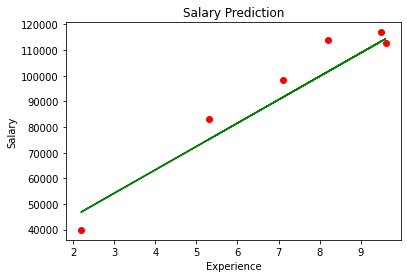

In [0]:
import matplotlib.pyplot as plt
plt.scatter(X_test.astype('float'),y_test.astype('float'),color='red')
plt.plot(X_test,y_pred,color='green')
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.title("Salary Prediction")
plt.show()

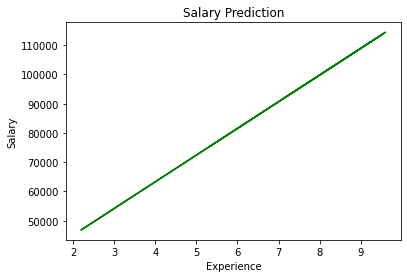